In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
from indigo import Indigo
from indigo.renderer import IndigoRenderer
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdAbbreviations

indigo = Indigo()
renderer = IndigoRenderer(indigo)

In [80]:
import pandas as pd
train_df = pd.read_csv('../data/molbank/indigo-data/train.csv')

In [ ]:
# mol = indigo.loadMolecule('[R]C(NC1=NC2=CC=CC=C2S1)=O')
# m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m = Chem.MolFromSmiles('CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1')
display(m)
print(m.GetNumAtoms())
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,sanitize=True)

# print(Chem.MolToV3KMolBlock(nm))
Chem.MolToMolFile(nm, 'tmp.mol', forceV3000=True)

(510, 423, 3)
[255. 255. 255.]
[1. 1. 1.]


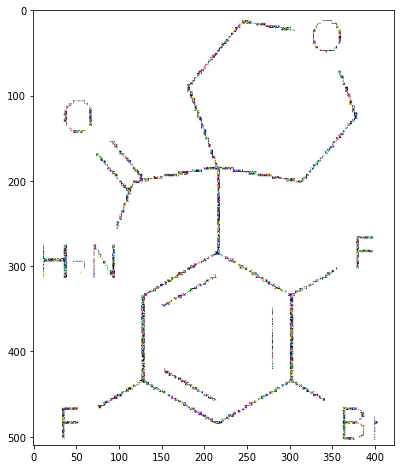

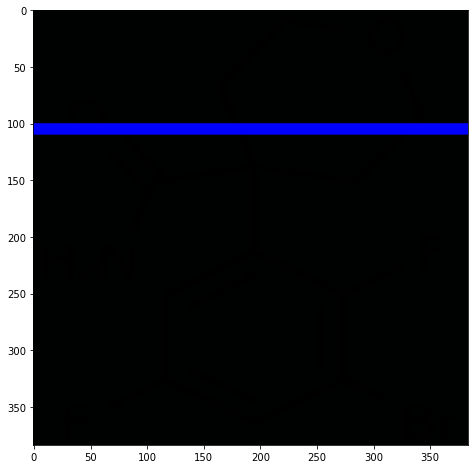

In [423]:
import json
import albumentations as A
from albumentations.pytorch import ToTensorV2
from bms.augment import ExpandSafeRotate, CropWhite, ResizePad

def get_transforms(labelled=True):
    trans_list = []
    if labelled:
        trans_list += [
            A.Downscale(scale_min=0.25, scale_max=0.5),
            A.Blur(),
            A.GaussNoise(always_apply=True)
        ]
#     trans_list.append(CropWhite(pad=3))
#     trans_list.append(A.Resize(384, 384))
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    trans_list += [
#         A.ToGray(p=1),
#         A.Normalize(mean=mean, std=std),
#         ToTensorV2(),
    ]
    return A.Compose(trans_list)

transform = get_transforms()

with open('../image/115.json') as f:
    obj = json.load(f)
img = np.asarray(obj['image'])
# plt.imshow(obj['raw'])
# plt.show()
image = np.asarray(obj['raw'], dtype=np.uint8)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
print(image[0][0])
augmented = transform(image=image)['image']
print(augmented[0][0])
plt.figure(figsize=(8,8))
plt.imshow(augmented)
plt.show()
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = (img.transpose(1,2,0) * std + mean) * 255
img = img.astype(int)
img[100:110] = [0,0,255]
plt.figure(figsize=(8,8))
plt.imshow(img)
cv2.imwrite('10.png', img)
grid = obj['grid']
# for i, row in enumerate(grid):
#     for j, c in enumerate(row):
#         if c == 0:
#             print(' ', end='')
#         else:
#             print(c, end='')
#     print()

(214, 404, 3)


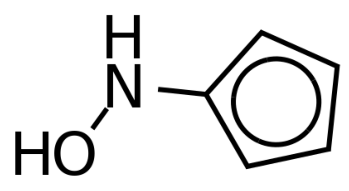

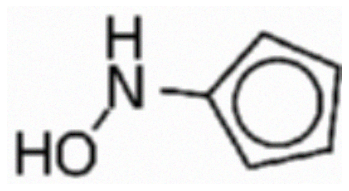

In [457]:
mol = indigo.loadMolecule('ONc1cccc1')
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-superatom-mode', 'collapse')
indigo.setOption('render-bond-length', '100')
indigo.setOption('render-relative-thickness', 1.8)
indigo.setOption('render-bond-line-width', 1.)
indigo.setOption('render-label-mode', 'terminal-hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
img = renderer.renderToBuffer(mol)
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 1)
# img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
plt.imshow(img)
# plt.xlim(0, 900)
# plt.ylim(400)
# plt.scatter(data[:,2],data[:,3])

print(img.shape)
mol.layout()
nodes = []
for atom in mol.iterateAtoms():
#     print(atom.xyz(), atom.coords())
    nodes.append(atom.coords())
nodes = np.array(nodes)

# plt.scatter(nodes[:,0], nodes[:,1])
plt.axis('off')
plt.show()

transform = A.Compose([
    A.Downscale(scale_min=0.25, scale_max=0.5),
    A.Blur(),
    A.GaussNoise()
])

aug_img = transform(image=img)['image']
plt.imshow(aug_img)
plt.axis('off')
plt.show()

CCN(C1=NC(=CS1)CC(=O)NC2=CC=C(C=C2)Cl)C(=O)CCC(=O)[O-]
(565, 1331, 3)


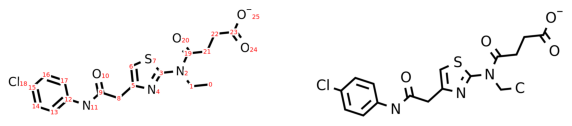

C1=CC=C(C=C1)C[C@H](C(=O)O)OC2=C(C=C(C=C2Cl)C3=CC4=C(C=C3)NC=C4)Cl
(512, 1052, 3)
6 7 5


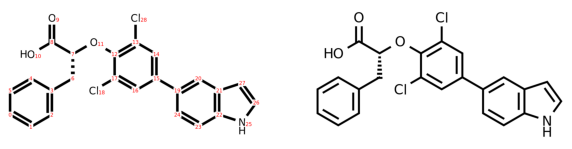

C1=CC=C(C=C1)/C=C/[C@H]2NC3=CC=CC=C3C(=O)N2CC4=CC=CO4
(471, 846, 3)
7 8 5


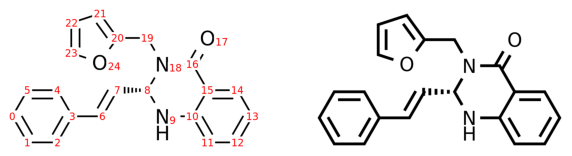

CC(=O)C1=CC=C(C=C1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H](O2)CO)O)O)O
(507, 866, 3)
9 10 5
11 20 5
12 19 6
13 18 5
14 16 6


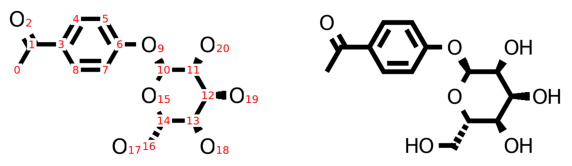

CC1=[N+](NOC1=O)CCCS(=O)C2=CC=CC=C2
(323, 918, 3)


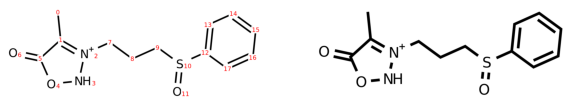

B(C1=CC=CC=C1)(C2=CC=CC=C2)OC[C@H](CC3=CC=CC=C3)N
(540, 910, 3)
15 23 6


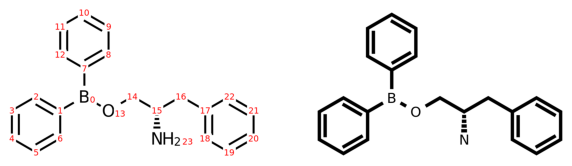

COC(=O)[C@@H]1CS[C@@H]2N1C(=O)[C@H]([C@H]([C@@H]2O)O)O
(392, 701, 3)
2 4 5
6 7 6
11 16 6
12 15 6
13 14 5


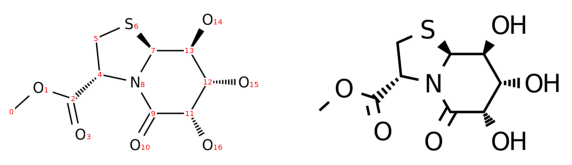

C1=CC=C(C=C1)OC2=CC=CC(=C2)C=NNC(=O)C(=O)NC3=CC=CC=C3C(=O)NC4=CC=C(C=C4)Cl
(802, 1255, 3)


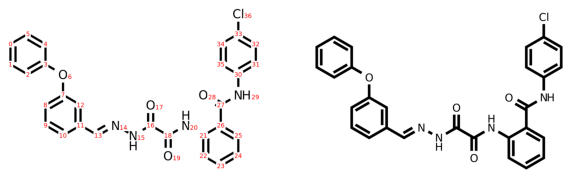

C1=CC=C(C=C1)CNC[C@H](C2=CC(=CC=C2)O)O
(382, 935, 3)
9 17 5


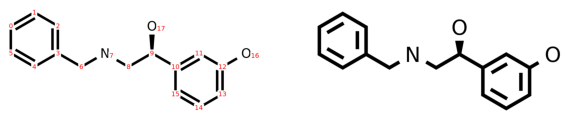

CC(=O)NCCC1=NC(=CS1)C2=NC(=CS2)C(=O)NCCCN
(372, 1488, 3)


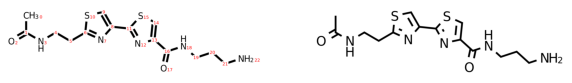

CC(C)(C)C1=CC=C(C=C1)C2=CC3=C(C=CC(=C3)Cl)C4=NCCN24.Cl
(624, 1238, 3)


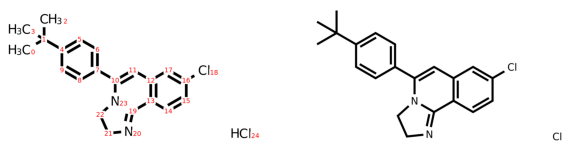

C1CC(=O)N(C1)CCCNC(=O)CN2C(=O)[C@@]3(CCOC4=CC=CC=C43)NC2=O
(500, 1194, 3)
14 16 6


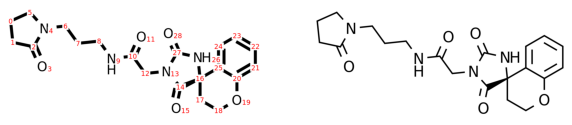

CC(C)[C@@H](C1=CC=C(C=C1)Cl)C(=O)OCC(=O)C2=C(N(C(=O)NC2=O)C)N
(455, 1147, 3)
1 3 5


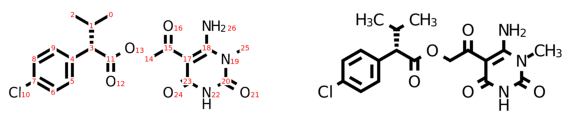

C[C@H](C(=O)NNC(=O)C1=CC=CC=C1)OC(=O)C(C)C
(362, 1012, 3)
0 1 6


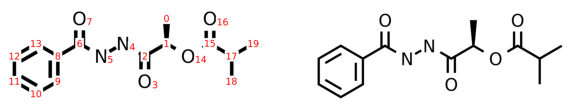

C1COC2=C(O1)C=CC(=C2)S(=O)(=O)N[C@H](CCC(=O)N)C(=O)[O-]
(514, 893, 3)
13 14 6


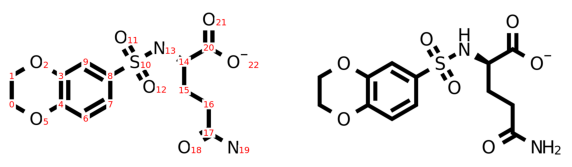

C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CC(C)C)N
(874, 1773, 3)
0 1 5
4 5 5
19 20 5
22 23 5
32 34 6
43 45 5
54 59 6


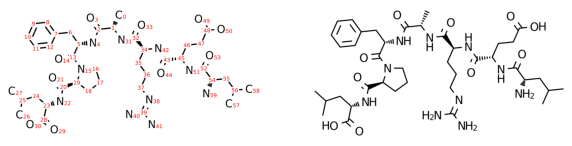

CC[C@H](C)NC1=C2C=NN(C2=NC=N1)C3=C(C=C(C=C3)C)C
(422, 1235, 3)
2 3 5


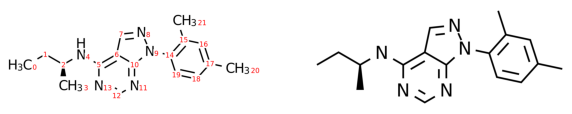

CCCCCCCC(=O)N1CCC(CC1)C2=NC(=NO2)C3=CC(=CC=C3)OC
(485, 1534, 3)


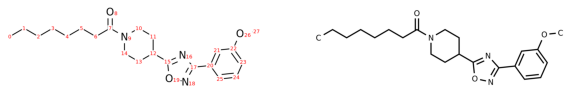

C1=CC=C(C=C1)COC(=O)N2[C@H](C(=O)O[C@@H]([C@@H]2C3=CC=CC=C3)C4=CC=CC=C4)CCCCCI
(652, 1021, 3)
11 29 5
15 23 6
16 17 6


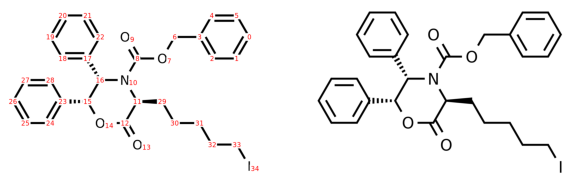

C1CC#C/C(=C\C2=CC=CC=C2)/C(C#CC(C1)OC(=O)C3=CC4=C(C=C3)C(=O)C5=CC=CC=C5C4=O)O
(660, 1442, 3)


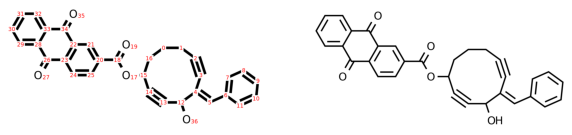

C[C@H](C(=O)N[C@@H](CC1=CC=C(C=C1)F)C(=O)O)N
(360, 861, 3)
0 1 5
4 5 6


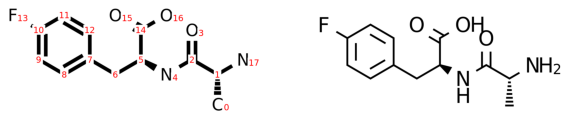

In [14]:
import random
import pandas as pd
from tqdm import tqdm
import sys
sys.path.append('/Mounts/rbg-storage1/users/yujieq/bms')
from bms.dataset import generate_indigo_image

df = pd.read_csv('../data/molbank/pubchem/train_200k.csv')

for idx, row in df.iterrows():
    smiles = row['SMILES']
    print(smiles)
    plt.figure(figsize=(10,5))
#     img, _, graph, success = generate_indigo_image(smiles, debug=True)
#     plt.subplot(1,2,1)
#     print(img.shape)
#     h, w, _ = img.shape
#     coords = np.array(graph['coords'])
#     plt.scatter(coords[:,1]*w, coords[:,0]*h)
#     plt.imshow(img)
    img, _, graph, success = generate_indigo_image(smiles, debug=True, mol_augment=False)
    print(img.shape)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.axis('off')
    img, *_ = generate_indigo_image(smiles, debug=False, mol_augment=False)
    plt.imshow(img)
    h, w, _ = img.shape
    coords = np.array(graph['coords'])
    x = coords[:,1]*w
    y = coords[:,0]*h
    for i in range(len(x)):
        for j in range(len(x)):
            if graph['edges'][i][j] != 0 and i < j:
                if graph['edges'][i][j] in [5,6]:
                    print(i, j, graph['edges'][i][j])
#                 plt.plot([x[i], x[j]], [y[i], y[j]], 'g', linewidth=6)
#     plt.scatter(x, y, 180, color='b')
    plt.xlim(-20,w+10)
    plt.ylim(h+10,-20)
    plt.show()
    if idx >= 20:
        break

<class 'array.array'>
37318
(564, 911, 3)


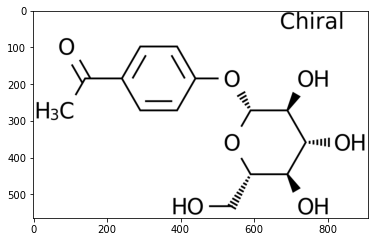

In [70]:
mol = indigo.loadMolecule("CC(=O)C1=CC=C(C=C1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H](O2)CO)O)O)O")
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-relative-thickness', 1.5)
indigo.setOption('render-bond-line-width', 1)
# renderer.renderToFile(mol1, "mol.png")
img = renderer.renderToBuffer(mol)
print(type(img))
print(len(img))
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 0)
img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
print(img.shape)
plt.imshow(img)
plt.show()

# import albumentations as A
# transform = A.Compose([
#     A.Downscale(scale_min=0.25, scale_max=0.5),
#     A.Blur(),
#     A.GaussNoise()
# ])

# aug_img = transform(image=img)['image']
# plt.imshow(aug_img)
# plt.axis('off')
# plt.show()

In [ ]:
import os
import pandas as pd

for split in ['train', 'valid', 'test']:
    df = pd.read_csv(f'data/molbank/chemdraw-data/{split}.csv')
    for i, row in df.iterrows():
        path = row['file_path'].replace('chemdraw-data', 'indigo-data')
        if 'abb-images' in path:
            continue
        dirname, filename = os.path.split(path)
        os.makedirs(dirname, exist_ok=True)
        try:
            mol = indigo.loadMolecule(row['SMILES'])
            renderer.renderToFile(mol, path)
        except:
            print(path, row['SMILES'])

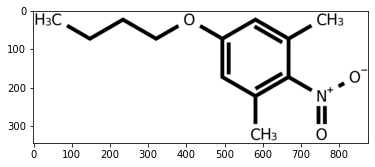

In [428]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import SVG


path = 'data/molbank/chemdraw-data/images/sty3-images/8001.png'
smiles = 'C1C2C3C2[C@]4(C1[C@@]3(C5C6C7C6C(=O)C5C74)O)O'

path = "data/molbank/chemdraw-data/images/std-images/2.png"
smiles = "CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1"

# img = cv2.imread(path)
# plt.imshow(img)
# plt.show()

# smiles = "COC(O)=NC1CCN(CCCC(=N)S)C1"

indigo.setOption('render-bond-length', '100')
indigo.setOption('render-relative-thickness', 1.)
indigo.setOption('render-bond-line-width', 3.)
indigo.setOption('render-label-mode', 'terminal-hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
mol = indigo.loadMolecule(smiles)
renderer.renderToFile(mol, 'mol.png')

img = cv2.imread('mol.png')
plt.figure()
plt.imshow(img)
plt.show()

# mol = Chem.MolFromSmiles("COC(O)=NC1CCN(CCCC(=N)S)C1")
# img = Draw.MolsToGridImage([mol], subImgSize=(384,384), molsPerRow=1, useSVG=True)
# display(SVG(img.data))


In [51]:
import albumentations as A
from bms.augment import CropWhite

def get_transforms():
    trans_list = []
    trans_list.append(CropWhite(pad=3))
    trans_list.append(A.Resize(384, 384))
    trans_list += [
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        )
    ]
    return A.Compose(trans_list)

transform = get_transforms()

data/molbank/indigo-data/images/std-images/92730.png
(666, 1441, 3)


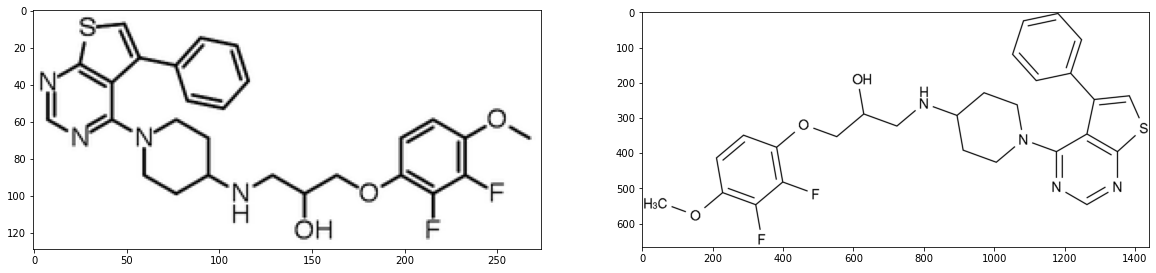

data/molbank/indigo-data/images/std-images/92731.png
(635, 1662, 3)


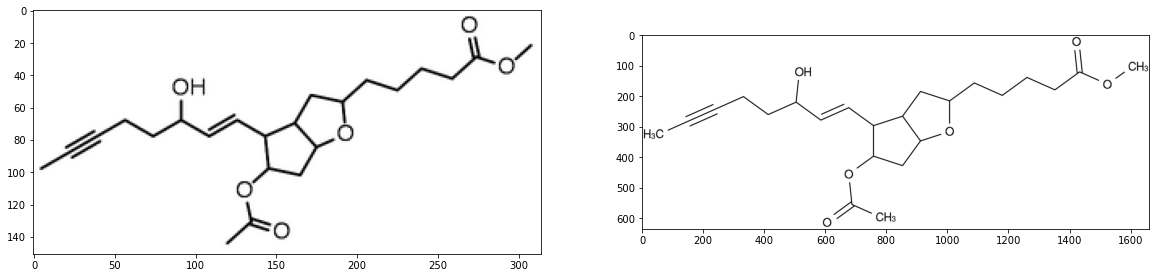

data/molbank/indigo-data/images/std-images/92732.png
(680, 1388, 3)


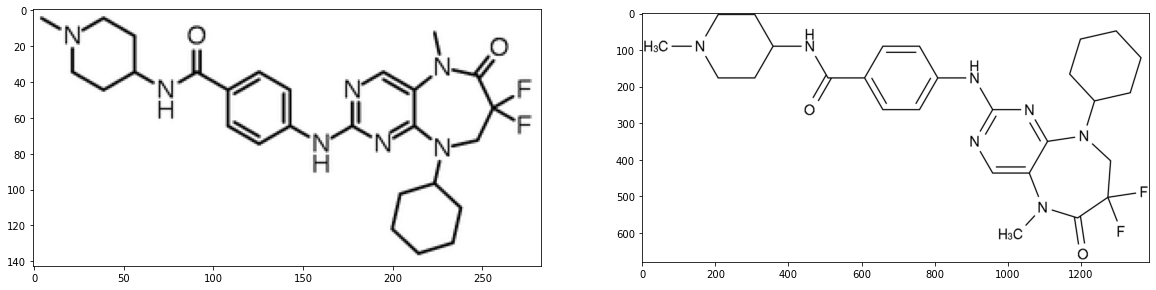

data/molbank/indigo-data/images/std-images/92733.png
(93, 515, 3)


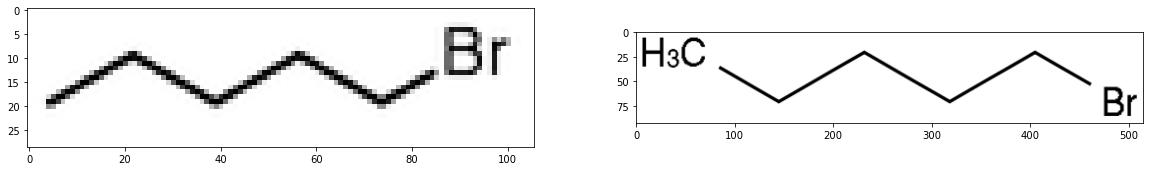

data/molbank/indigo-data/images/std-images/92734.png
(243, 599, 3)


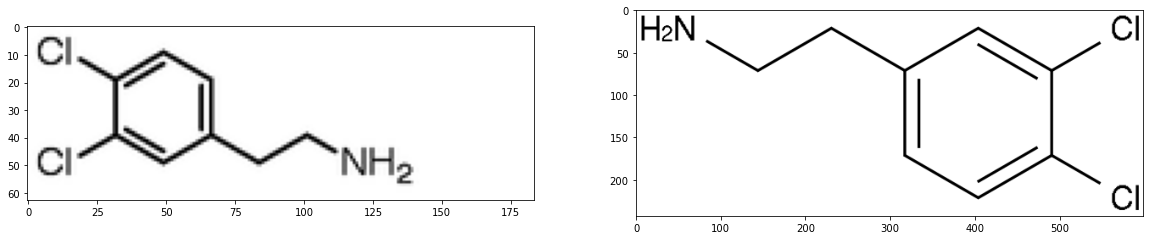

In [76]:
PATH = '/data/rsg/nlp/yujieq/bms/'
df = pd.read_csv('data/molbank/chemdraw-data/test.csv')

for i, row in df.iterrows():
    if i == 5:
        break
    plt.figure(figsize=(20,10))
    path = row['file_path']
    plt.subplot(1,2,1)
    img = cv2.imread(PATH + path)
#     img = transform(image=img)['image']
    plt.imshow(img)
    plt.subplot(1,2,2)
    path = path.replace('chemdraw', 'indigo')
    img = cv2.imread(PATH + path, cv2.IMREAD_UNCHANGED)
#     img = transform(image=img)['image']
    print(path)
    print(img.shape)
    plt.imshow(img)
    plt.show()